In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
print("Setup Complete")

Setup Complete


In [2]:
file_path = "/home/apprenant/simplon_projects/foodflix/data/01_raw/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t')


/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(356027, 163)

In [4]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [5]:
df['nutrition_grade_uk']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
356022   NaN
356023   NaN
356024   NaN
356025   NaN
356026   NaN
Name: nutrition_grade_uk, Length: 356027, dtype: float64

In [6]:
df['fruits-vegetables-nuts_100g'].isna().value_counts()



True     352799
False      3228
Name: fruits-vegetables-nuts_100g, dtype: int64

In [7]:
df['fruits-vegetables-nuts-estimate_100g'].isna().value_counts()

True     355623
False       404
Name: fruits-vegetables-nuts-estimate_100g, dtype: int64

In [8]:
df['nutrition_grade_fr'].isnull().value_counts()

False    254856
True     101171
Name: nutrition_grade_fr, dtype: int64

In [9]:

df['nutrition-score-fr_100g'].isnull().value_counts()

False    254856
True     101171
Name: nutrition-score-fr_100g, dtype: int64

In [10]:
df['nutrition-score-fr_100g'].unique()


array([ nan,  14.,   0.,  12.,   7.,  -6.,  15.,  11.,   9.,  16.,  19.,
        -1.,   6.,  26.,  13.,  10.,  17.,  23.,  30.,   8.,  25.,  -2.,
         1.,  18.,   2.,  21.,  20.,  22.,   3.,   4.,  24.,  27.,  28.,
        -3.,  -4.,  -7.,  -5.,   5.,  29.,  31.,  -8.,  -9.,  35.,  33.,
        32.,  34., -10., -13.,  40.,  37.,  38., -11.,  36., -12., -14.,
       -15.])

In [11]:
df['nutrition_grade_fr'].unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

In [12]:
print(df['nutrition_grade_fr'].isna().value_counts())

False    254856
True     101171
Name: nutrition_grade_fr, dtype: int64


In [13]:
df['nutrition_grade_uk'].unique()

array([nan])

In [14]:
df.sample(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
9601,11284241003,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489092737,2017-03-09T20:52:17Z,1489092737,2017-03-09T20:52:17Z,Apple Pie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
155699,826504847060,http://world-en.openfoodfacts.org/product/0826...,usda-ndb-import,1489091590,2017-03-09T20:33:10Z,1489091590,2017-03-09T20:33:10Z,Cod Fillets,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
34153,36800421387,http://world-en.openfoodfacts.org/product/0036...,usda-ndb-import,1489074538,2017-03-09T15:48:58Z,1489074539,2017-03-09T15:48:59Z,"Home Style Cookies, Iced Oatmeal",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN
243151,3366321097042,http://world-en.openfoodfacts.org/product/3366...,openfoodfacts-contributors,1470474656,2016-08-06T09:10:56Z,1495119933,2017-05-18T15:05:33Z,Omega 3,NaN,255,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,16.0,NaN,NaN
102227,83322015488,http://world-en.openfoodfacts.org/product/0083...,usda-ndb-import,1489053517,2017-03-09T09:58:37Z,1489053518,2017-03-09T09:58:38Z,"Bon Yurt, Sandwiches Cookies, Cookies & Cream",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
311371,5998400307940,http://world-en.openfoodfacts.org/product/5998...,offh,1494769185,2017-05-14T13:39:45Z,1495274069,2017-05-20T09:54:29Z,Cerbona Narancsos-fahéjas ropogós müzliszelet,"Narancsos-fahéjas ropogós müzliszelet, kakaós ...",25 g,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
106986,88724168893,http://world-en.openfoodfacts.org/product/0088...,usda-ndb-import,1489094855,2017-03-09T21:27:35Z,1489094855,2017-03-09T21:27:35Z,Yogurt Granola Parfait Mixed Berry,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
213201,3250390009252,http://world-en.openfoodfacts.org/product/3250...,domdom26,1427017464,2015-03-22T09:44:24Z,1427194779,2015-03-24T10:59:39Z,Lait riz croustillant,Chocolat au lait et au riz,100 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266644,3596710431526,http://world-en.openfoodfacts.org/product/3596...,kiliweb,1493513413,2017-04-30T00:50:13Z,1495958814,2017-05-28T08:06:54Z,Blanc myrtille,NaN,115 g,...,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.0,NaN,NaN
270144,3700146200865,http://world-en.openfoodfacts.org/product/3700...,pamputt,1407795120,2014-08-11T22:12:00Z,1502195403,2017-08-08T12:30:03Z,Chouchous du Soleil,NaN,410 g,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN


In [15]:
df_sample = df.sample(n=10000, random_state=1)

In [16]:
list(df_sample.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [17]:
df_sample.shape

(10000, 163)

In [18]:
percent_of_nans = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percentage of nans per feature column')

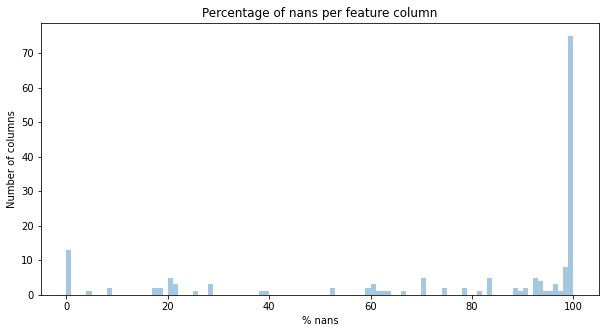

In [19]:


plt.figure(figsize=(10,5))
sns.distplot(percent_of_nans, bins=100, kde=False)
plt.xlabel("% nans")
plt.ylabel("Number of columns")
plt.title("Percentage of nans per feature column")



In [20]:
useless_features = percent_of_nans[percent_of_nans > 99].index
useless_features

Index(['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g',
       '-melissic-acid_100g', 'glycemic-index_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-caprylic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g',
       '-maltose_100g', 'nucleotides_100g', '-arachidonic-acid_100g',
       '-maltodextrins_100g', '-oleic-acid_100g', '-gondoic-acid_100g',
       'serum-proteins_100g', 'molybdenum_100g', 'allergens_en',
       'chromium_100g', 'omega-9-fat_100g',
       '-dihomo-gamma-linolenic-acid_100g', '-behenic-acid_100g', 'cities',
       '-gamma-linolenic-acid_100g', '-arachidic-acid_100g', 'casein_100g',
       '-glu

In [21]:


len(useless_features)



75

In [22]:
df.drop(useless_features, axis=1, inplace=True)
df.shape

(356027, 88)

In [23]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_cat

In [24]:
df = df[
['product_name',
 'brands',
 'ingredients_text',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',]
]

In [25]:
df.shape

(356027, 12)

<AxesSubplot:>

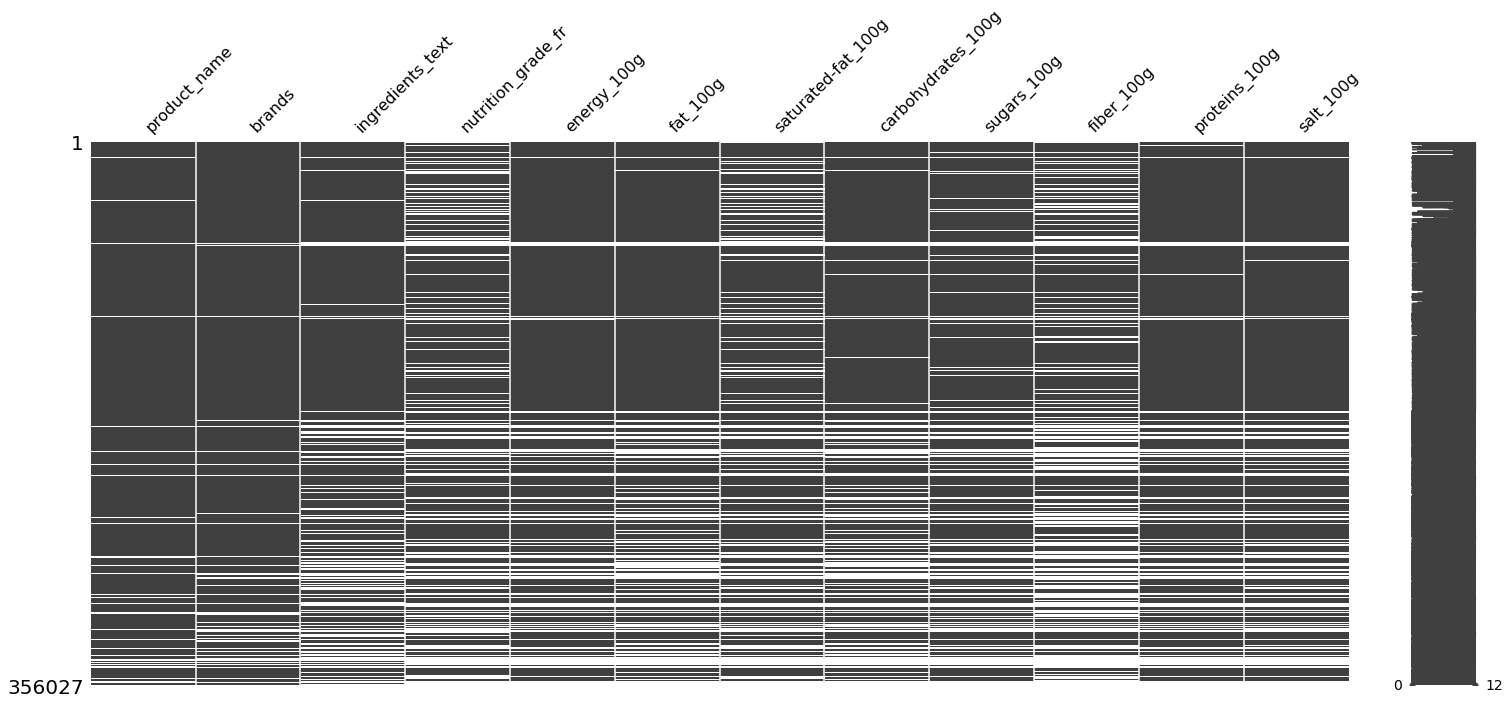

In [26]:
msno.matrix(df)

In [27]:
df.head()

,product_name,brands,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000
2,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500
3,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428
4,Organic Polenta,Bob's Red Mill,Organic polenta,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN


In [31]:
df.loc[df['fat_100g'] > 3700]

,product_name,brands,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
177004,15666666666,NaN,NaN,NaN,NaN,1.566667e+10,NaN,1.566667e+10,NaN,NaN,1.566667e+10,NaN
